In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys

sys.path.insert(0, "/Users/flynnwang/repo/flynn/eco_bang_bang/agents/rule_0202")

In [3]:
sys.path.insert(0, "/Users/flynnwang/repo/flynn/eco_bang_bang/agents")

In [4]:
# from ebb.env.const import *

In [5]:
import torch

from ecobangbang.env.luxenv import get_ob_sapce, LuxS3Env
from ecobangbang.model import _create_model, RewardSpec

reward_spec = RewardSpec(
        reward_min=-5,
        reward_max=+5,
        zero_sum=False,
    )

reward_shaping_params = dict(  new_observed_down_tri=0.0001,
  match_observed=0,
  match_win=1,
  use_hidden_relic_estimator=True,
  energy_cost_change=0.001,                             
)

obs_space_kwargs = {
    'use_energy_cost_map': True,
    'use_single_player': False,
}
env = LuxS3Env(reward_schema='match_explore_win_loss',
               reward_shaping_params=reward_shaping_params,
              obs_space_kwargs=obs_space_kwargs)

obs, reward, done, info = env.reset()

In [6]:
from ecobangbang.agent import Agent

from rule_v3_4a0760b.ecobangbang.agent import Agent as Agent2

# Feature Plots

In [7]:
def plot_imgs(images):
    grid_size = 3
    fig, axes = plt.subplots(grid_size + 1, grid_size, figsize=(10, 10))
    
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            name, img = images[i]
            img = img.T
            ax.imshow(img, cmap='viridis')  # Display image (grayscale here)
            ax.set_title(name, fontsize=8)
            ax.axis('off')  # Turn off the axes
            ax.set_xticks(np.arange(-0.5, img.shape[1], 1))  # Position gridlines at the edges of the pixels
            ax.set_yticks(np.arange(-0.5, img.shape[0], 1))  # Position gridlines at the edges of the pixels
            # Set gridlines to be visible
            ax.grid(which='both', color='black', linestyle='-', linewidth=.5)
        else:
            ax.axis('off')  # Turn off the axes for empty slots
    
    plt.tight_layout()
    plt.show()

In [8]:
import ecobangbang

ecobangbang

<module 'ecobangbang' from '/Users/flynnwang/repo/flynn/eco_bang_bang/agents/rule_0202/ecobangbang/__init__.py'>

In [9]:
from ecobangbang.env.luxenv import LuxS3Env
from ecobangbang.env.const import *


env = LuxS3Env(reward_schema='match_explore_win_loss',
               reward_shaping_params=reward_shaping_params,
              obs_space_kwargs=obs_space_kwargs)
obs, reward, done, info = env.reset(seed=1544283652)

def act(a, ob):
    player_id = a.player
    step = ob['steps']
    actions = a.act(step, ob)
    return actions

env_cfg = env.mms[0].env_cfg
# a0 = Agent2('player_0', env_cfg)
a0 = Agent('player_0', env_cfg)
a1 = Agent('player_1', env_cfg)

In [10]:
for i in range(100):
    action0 = env.agent_action_do_model_action(act(a0, env.mms[0].past_obs[0]), env.mms[0])
    action1 = env.agent_action_do_model_action(act(a1, env.mms[1].past_obs[0]), env.mms[1])
    player_actions = [{UNITS_ACTION: action0}, {UNITS_ACTION: action1}]
    obs, reward, done, info = env.step(player_actions)

============ game step 1 ========== 
 +++ step=0 to-exp-cell-num=576 exp_score=2.9948006932409013 has_found_relic=False, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=0
============ game step 1 ========== 
 +++ step=0 to-exp-cell-num=576 exp_score=2.9948006932409013 has_found_relic=False, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=0


step=1 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]


[debug][step=1] comm_visible.sum() = 0
***** --> found energy node at [15  2]
step=0 (after update), energy field found=True, node=[15  2], candidates=[array([15,  2])]
--> using energy node at [15  2]
[debug][step=1] comm_visible.sum() = 0


xxxxxxxxxxx  1


***** --> found energy node at [15  2]
step=0 (after update), energy field found=True, node=[15  2], candidates=[array([15,  2])]
--> using energy node at [15  2]
============ game step 1 ========== 
[debug][step=1] comm_visible.sum() = 0


xxxxxxxxxxx  1


***** --> found energy node at [15  2]
step=0 (after update), energy field found=True, node=[15  2], candidates=[array([15,  2])]
--> using energy node at [15  2]
 +++ step=1 to-exp-cell-num=526 exp_score=3.2789373814041745 has_found_relic=False, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=0
 unit[0]=[0 0] assgined to cell=(0, 5), wts={'explore_wt': np.float64(3.2789373814041745), 'fuel_wt': np.float64(0.7469088762520901), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.639344262295082), 'wt': np.float64(2.272585258851523), 'mdist': np.float64(1.7715610000000008)}
pid=[player_0] game_step=1 sending unit=0 pos=[0 0] to cell=(0, 5)
============ game step 1 ========== 
[debug][step=1] comm_visible.sum() = 0


xxxxxxxxxxx  1


***** --> found energy node at [15  2]
step=0 (after update), energy field found=True, node=[15  2], candidates=[array([15,  2])]
--> using energy node at [15  2]
 +++ step=1 to-exp-cell-num=526 exp_score=3.2789373814041745 has_found_relic=False, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=0
 unit[0]=[23 23] assgined to cell=(18, 23), wts={'explore_wt': np.float64(3.2789373814041745), 'fuel_wt': np.float64(0.7469088762520901), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.639344262295082), 'wt': np.float64(2.272585258851523), 'mdist': np.float64(1.7715610000000008)}
pid=[player_1] game_step=1 sending unit=0 pos=[23 23] to cell=(18, 23)
[debug][step=2] comm_visible.sum() = 25


xxxxxxxxxxx  1
step=2 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]


***** --> found energy node at [17  4]
----------small reset energy node positions, found? = True
energy field changed at step = 1
step=1 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
[debug][step=2] comm_visible.sum() = 25
***** --> found energy node at [17  4]


xxxxxxxxxxx  2
xxxxxxxxxxx  2


----------small reset energy node positions, found? = True
energy field changed at step = 1
step=1 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
============ game step 2 ========== 
[debug][step=2] comm_visible.sum() = 25
***** --> found energy node at [17  4]
----------small reset energy node positions, found? = True
energy field changed at step = 1
step=1 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
 +++ step=2 to-exp-cell-num=516 exp_score=3.3423597678916828 has_found_relic=False, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=0
 unit[0]=[0 1] assgined to cell=(2, 6), wts={'explore_wt': np.float64(3.3423597678916828), 'fuel_wt': np.float64(0.541919554856682), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.596774193548387), 'wt': np.float64(1.8121449708581758), 'mdist': np.float

xxxxxxxxxxx  2
xxxxxxxxxxx  2
step=3 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  3


***** --> found energy node at [17  4]
----------small reset energy node positions, found? = True
energy field changed at step = 1
step=1 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
 +++ step=2 to-exp-cell-num=516 exp_score=3.3423597678916828 has_found_relic=False, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=0
 unit[0]=[22 23] assgined to cell=(17, 21), wts={'explore_wt': np.float64(3.3423597678916828), 'fuel_wt': np.float64(0.541919554856682), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.596774193548387), 'wt': np.float64(1.8121449708581758), 'mdist': np.float64(2.1435888100000016)}
pid=[player_1] game_step=2 sending unit=0 pos=[22 23] to cell=(17, 21)
[debug][step=3] comm_visible.sum() = 30
step=2 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
[debug][step=3] comm_visible.s

xxxxxxxxxxx  3
xxxxxxxxxxx  3
xxxxxxxxxxx  3
step=4 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  4
xxxxxxxxxxx  4
xxxxxxxxxxx  4
xxxxxxxxxxx  4
step=5 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  5
xxxxxxxxxxx  5
xxxxxxxxxxx  5
xxxxxxxxxxx  5
step=6 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  6
xxxxxxxxxxx  6
xxxxxxxxxxx  6
xxxxxxxxxxx  6
step=7 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  7
xxxxxxxxxxx  7
xxxxxxxxxxx  7
xxxxxxxxxxx  7
step=8 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], fin

 unit[0]=[19 21] assgined to cell=(14, 21), wts={'explore_wt': np.float64(3.8314855875831486), 'fuel_wt': np.float64(0.7915947963344586), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.537313432835821), 'wt': np.float64(2.6097083532644967), 'mdist': np.float64(1.7715610000000008)}
 unit[1]=[21 22] assgined to cell=(21, 16), wts={'explore_wt': np.float64(3.8314855875831486), 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.4776119402985075), 'wt': np.float64(1.966257934152241), 'mdist': np.float64(1.9487171000000012)}
 unit[2]=[23 23] assgined to cell=(23, 16), wts={'explore_wt': np.float64(3.8314855875831486), 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.492537313432836), 'wt': np.float64(1.7875163037747643), 'mdist': np.float64(2.1435888100000016)}
pid=[player_1] game_step=7 sending unit=0 pos=[19

step=9 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  9
xxxxxxxxxxx  9
xxxxxxxxxxx  9
xxxxxxxxxxx  9
step=10 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  10
xxxxxxxxxxx  10
xxxxxxxxxxx  10
xxxxxxxxxxx  10
step=11 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  11
xxxxxxxxxxx  11
xxxxxxxxxxx  11
xxxxxxxxxxx  11
step=12 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  12
xxxxxxxxxxx  12
xxxxxxxxxxx  12


 unit[0]=[16 20] assgined to cell=(12, 20), wts={'explore_wt': np.float64(4.632707774798928), 'fuel_wt': np.float64(0.9868467394629294), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.5352112676056338), 'wt': np.float64(3.4894012239985193), 'mdist': np.float64(1.6105100000000006)}
 unit[1]=[20 19] assgined to cell=(10, 19), wts={'explore_wt': np.float64(4.632707774798928), 'fuel_wt': np.float64(2.627177691959797), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3943661971830985), 'wt': np.float64(2.5446455670325525), 'mdist': np.float64(2.8531167061100025)}
 unit[2]=[21 21] assgined to cell=(11, 20), wts={'explore_wt': np.float64(4.632707774798928), 'fuel_wt': np.float64(1.7475030009987824), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.408450704225352), 'wt': np.float64(2.033031776656853), 'mdist': np.float64(3.138428376721003)}
 unit[3]=[22 23] assgin

xxxxxxxxxxx  12
step=13 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  13
xxxxxxxxxxx  13
xxxxxxxxxxx  13
xxxxxxxxxxx  13
step=14 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  14
xxxxxxxxxxx  14
xxxxxxxxxxx  14
xxxxxxxxxxx  14
step=15 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  15
xxxxxxxxxxx  15
xxxxxxxxxxx  15


 unit[0]=[13 20] assgined to cell=(10, 20), wts={'explore_wt': np.float64(5.1891891891891895), 'fuel_wt': np.float64(0.23867852615468305), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6081081081081081), 'wt': np.float64(3.7074066835215294), 'mdist': np.float64(1.4641000000000004)}
 unit[1]=[18 20] assgined to cell=(10, 19), wts={'explore_wt': np.float64(5.1891891891891895), 'fuel_wt': np.float64(3.2048335324012998), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.337837837837838), 'wt': np.float64(3.236359131628225), 'mdist': np.float64(2.5937424601000023)}
 unit[2]=[19 20] assgined to cell=(19, 14), wts={'explore_wt': np.float64(5.1891891891891895), 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3918918918918919), 'wt': np.float64(2.66297455946745), 'mdist': np.float64(1.9487171000000012)}
 unit[3]=[21 21] assgined to cell=

xxxxxxxxxxx  15
step=16 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  16
xxxxxxxxxxx  16
xxxxxxxxxxx  16
xxxxxxxxxxx  16


 unit[0]=[ 4 11] assgined to cell=(4, 14), wts={'explore_wt': np.float64(5.958620689655173), 'fuel_wt': np.float64(0.06321270307528885), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.618421052631579), 'wt': np.float64(4.113093233201598), 'mdist': np.float64(1.4641000000000004)}
 unit[1]=[4 6] assgined to cell=(9, 11), wts={'explore_wt': np.float64(5.958620689655173), 'fuel_wt': np.float64(4.245714617988434), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.263157894736842), 'wt': np.float64(3.57665727359166), 'mdist': np.float64(2.8531167061100025)}
 unit[2]=[5 4] assgined to cell=(10, 4), wts={'explore_wt': np.float64(5.958620689655173), 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3026315789473684), 'wt': np.float64(3.363586038389404), 'mdist': np.float64(1.7715610000000008)}
 unit[3]=[3 3] assgined to cell=(10, 3), wts={'

step=17 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  17
xxxxxxxxxxx  17
xxxxxxxxxxx  17
xxxxxxxxxxx  17
step=18 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  18
xxxxxxxxxxx  18
xxxxxxxxxxx  18
xxxxxxxxxxx  18
step=19 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  19
xxxxxxxxxxx  19
xxxxxxxxxxx  19


 unit[0]=[12 19] assgined to cell=(20, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.056134762834133725), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6153846153846154), 'wt': np.float64(3.9352867770839093), 'mdist': np.float64(3.7974983358324144)}
 unit[1]=[17 17] assgined to cell=(20, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.1923076923076923), 'wt': np.float64(8.467208950806658), 'mdist': np.float64(1.7715610000000008)}
 unit[2]=[19 16] assgined to cell=(20, 16), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5162056739454963), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.294871794871795), 'wt': np.float64(12.823410474335118), 'mdist': np.float64(1.2100000000000002)}
 unit[3]=[20 18] assgined to cell=(21, 16), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 15, '

xxxxxxxxxxx  19
step=20 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  20
xxxxxxxxxxx  20
xxxxxxxxxxx  20
xxxxxxxxxxx  20
step=21 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  21
xxxxxxxxxxx  21
xxxxxxxxxxx  21
xxxxxxxxxxx  21


============ game step 21 ========== 
[debug][step=21] comm_visible.sum() = 143
step=20 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
 +++ step=21 to-exp-cell-num=208 exp_score=8.267942583732058 has_found_relic=True, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=5
 unit[0]=[3 9] assgined to cell=(9, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.1567284591235094), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6666666666666667), 'wt': np.float64(3.908797312864743), 'mdist': np.float64(3.7974983358324144)}
 unit[1]=[7 4] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.2345679012345678), 'wt': np.float64(10.245301830476057), 'mdist': np.float64(1.4641000000000004)}
 unit[2]=[8 2] assgined to cell=(8, 0), wts={'explore_wt': 0, 'fu

step=22 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  22
xxxxxxxxxxx  22
xxxxxxxxxxx  22
xxxxxxxxxxx  22
step=23 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  23
xxxxxxxxxxx  23
xxxxxxxxxxx  23
xxxxxxxxxxx  23


pid=[player_1] game_step=22 sending unit=4 pos=[20 17] to cell=(20, 13)
pid=[player_1] game_step=22 sending unit=5 pos=[20 20] to cell=(20, 12)
pid=[player_1] game_step=22 sending unit=6 pos=[21 22] to cell=(22, 14)
pid=[player_1] game_step=22 sending unit=7 pos=[23 23] to cell=(23, 12)
[debug][step=23] comm_visible.sum() = 140
step=22 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
[debug][step=23] comm_visible.sum() = 132
step=22 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
gstep=23, mstep=23, nebula_energy_reduction=5
 [debug] unit=3, [22 16]=>[22 15] e=(98=93) a=1
============ game step 23 ========== 
[debug][step=23] comm_visible.sum() = 140
step=22 (after update), energy field found=True, node=[17  4], candidates=[array([17,  4])]
--> using energy node at [17  4]
 +++ step=23 to-exp-cell-num=182 exp_score=9.442622950819672 has_found_relic=Tr

step=24 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  24
xxxxxxxxxxx  24
xxxxxxxxxxx  24
xxxxxxxxxxx  24
step=25 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  25
xxxxxxxxxxx  25
xxxxxxxxxxx  25
xxxxxxxxxxx  25


 unit[0]=[17 20] assgined to cell=(21, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.1567284591235094), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6428571428571428), 'wt': np.float64(5.202576123422974), 'mdist': np.float64(2.8531167061100025)}
 unit[1]=[20 14] assgined to cell=(20, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.7261490370736909), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.1904761904761905), 'wt': np.float64(11.79667104374075), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[23 14] assgined to cell=(23, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.0714285714285714), 'wt': np.float64(12.396794214876032), 'mdist': np.float64(1.2100000000000002)}
 unit[3]=[21 15] assgined to cell=(23, 12), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 15, 'o

step=26 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  26
xxxxxxxxxxx  26
xxxxxxxxxxx  26
xxxxxxxxxxx  26
step=27 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  27
xxxxxxxxxxx  27
xxxxxxxxxxx  27
xxxxxxxxxxx  27


 unit[0]=[19 20] assgined to cell=(21, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.20428472840759607), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6046511627906976), 'wt': np.float64(5.704488735272488), 'mdist': np.float64(2.5937424601000023)}
 unit[1]=[20 12] assgined to cell=(21, 12), wts={'explore_wt': 0, 'fuel_wt': np.float64(-4.17635105705636), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.1395348837209303), 'wt': np.float64(8.945264415655899), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[23 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.float64(-4.900993366533776), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.0465116279069768), 'wt': np.float64(8.346386473939027), 'mdist': np.float64(1.2100000000000002)}
 unit[3]=[22 16] assgined to cell=(22, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(-4.97506239596

step=28 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  28
xxxxxxxxxxx  28
xxxxxxxxxxx  28
xxxxxxxxxxx  28
step=29 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  29
xxxxxxxxxxx  29
xxxxxxxxxxx  29
xxxxxxxxxxx  29


 unit[0]=[20 19] assgined to cell=(21, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.3368085770048024), 'relic_nb_wt': np.float64(11.887218755408671), 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.5454545454545454), 'wt': np.float64(5.927286751942527), 'mdist': np.float64(1.9487171000000012)}
 unit[1]=[21 13] assgined to cell=(20, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-1), 'relic_nb_wt': np.float64(11.887218755408671), 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.9886363636363636), 'wt': np.float64(8.179828591591786), 'mdist': np.float64(1.3310000000000004)}
 unit[2]=[23 12] assgined to cell=(23, 14), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.9659090909090909), 'wt': np.float64(6.761933208114198), 'mdist': np.float64(1.3310000000000004)}
 unit[3]=[22 14] assgined to cell=(22, 13), wts={'explore_wt': 0, 'fuel_wt': np.in

step=30 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  30
xxxxxxxxxxx  30
xxxxxxxxxxx  30
xxxxxxxxxxx  30
step=31 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  31
xxxxxxxxxxx  31
xxxxxxxxxxx  31


 unit[0]=[7 3] assgined to cell=(9, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.5335297047563181), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.4835164835164836), 'wt': np.float64(9.880893863290538), 'mdist': np.float64(1.4641000000000004)}
 unit[1]=[9 0] assgined to cell=(10, 0), wts={'explore_wt': 0, 'fuel_wt': np.int16(0), 'relic_nb_wt': np.float64(7.5), 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.8791208791208791), 'wt': np.float64(6.198447107438016), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[10  2] assgined to cell=(14, 9), wts={'explore_wt': 0, 'fuel_wt': np.float32(13.708333), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.7472527472527473), 'wt': np.float64(4.367997358156128), 'mdist': np.float64(3.138428376721003)}
 unit[3]=[11  2] assgined to cell=(13, 7), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.0), 'relic_nb_wt': 0, 'on_relic_wt': 

xxxxxxxxxxx  31
step=32 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  32
xxxxxxxxxxx  32
xxxxxxxxxxx  32
xxxxxxxxxxx  32


 unit[0]=[20 15] assgined to cell=(21, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.5948235150644843), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.4673913043478262), 'wt': np.float64(10.822922302731413), 'mdist': np.float64(1.3310000000000004)}
 unit[1]=[19 11] assgined to cell=(15, 10), wts={'explore_wt': 0, 'fuel_wt': np.float32(13.125), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.9239130434782609), 'wt': np.float64(7.408820331955825), 'mdist': np.float64(1.7715610000000008)}
 unit[2]=[23 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-5), 'relic_nb_wt': np.float64(11.887218755408671), 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.9239130434782609), 'wt': np.float64(5.6920163267840245), 'mdist': np.float64(1.2100000000000002)}
 unit[3]=[21 13] assgined to cell=(20, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-1), 'relic_nb_wt

step=33 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  33
xxxxxxxxxxx  33
xxxxxxxxxxx  33
xxxxxxxxxxx  33
step=34 final_state.energy_nodes=[[17  4]
 [12  5]
 [14  1]
 [19  6]
 [18 11]
 [22  9]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  34
xxxxxxxxxxx  34
xxxxxxxxxxx  34


 unit[0]=[9 2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(-1.297591000979324), 'relic_nb_wt': np.float64(15.0), 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.372340425531915), 'wt': np.float64(11.324404957868325), 'mdist': np.float64(1.2100000000000002)}
 unit[1]=[11  1] assgined to cell=(9, 0), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(15.0), 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.7446808510638298), 'wt': np.float64(6.147221098285634), 'mdist': np.float64(1.4641000000000004)}
 unit[2]=[11  4] assgined to cell=(14, 9), wts={'explore_wt': 0, 'fuel_wt': np.float32(13.708333), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.6914893617021277), 'wt': np.float64(5.813771383705807), 'mdist': np.float64(2.357947691000002)}
 unit[3]=[12  4] assgined to cell=(13, 7), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.0), 'relic_nb_wt': 0

xxxxxxxxxxx  34
step=35 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  35
xxxxxxxxxxx  35
xxxxxxxxxxx  35
xxxxxxxxxxx  35


 unit[0]=[22 14] assgined to cell=(23, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(-2.097003601198539), 'relic_nb_wt': np.float64(15.0), 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.305263157894737), 'wt': np.float64(10.663733387439223), 'mdist': np.float64(1.2100000000000002)}
 unit[1]=[17 10] assgined to cell=(14, 9), wts={'explore_wt': 0, 'fuel_wt': np.float32(13.708333), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.35), 'energy_ratio': np.float64(0.9894736842105263), 'wt': np.float64(9.97106138207269), 'mdist': np.float64(1.6105100000000006)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-5), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(29.966809218378483), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.7789473684210526), 'wt': np.float64(22.697199289434984), 'mdist': np.float64(1.1)}
 unit[3]=[21 12] assgined to cell=(21, 13), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6),

step=36 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]


***** --> found energy node at [20  2]
----------small reset energy node positions, found? = True
energy field changed at step = 35
step=35 (after update), energy field found=True, node=[20  2], candidates=[array([20,  2])]
--> using energy node at [20  2]
gstep=36, mstep=36, nebula_energy_reduction=5
 [debug] unit=0, [10  2]=>[10  2] e=(123=125) a=0
[debug][step=36] comm_visible.sum() = 192


xxxxxxxxxxx  36


***** --> found energy node at [20  2]
----------small reset energy node positions, found? = True
energy field changed at step = 35
step=35 (after update), energy field found=True, node=[20  2], candidates=[array([20,  2])]
--> using energy node at [20  2]
gstep=36, mstep=36, nebula_energy_reduction=5
 [debug] unit=0, [22 14]=>[23 14] e=(124=122) a=2
gstep=36, mstep=36, nebula_energy_reduction=5
 [debug] unit=2, [22 12]=>[22 12] e=(74=70) a=0
gstep=36, mstep=36, nebula_energy_reduction=5
 [debug] unit=3, [21 12]=>[21 13] e=(50=50) a=3
============ game step 36 ========== 
[debug][step=36] comm_visible.sum() = 188
***** --> found energy node at [20  2]
----------small reset energy node positions, found? = True
energy field changed at step = 35
step=35 (after update), energy field found=True, node=[20  2], candidates=[array([20,  2])]
--> using energy node at [20  2]
gstep=36, mstep=36, nebula_energy_reduction=5
 [debug] unit=0, [10  2]=>[10  2] e=(123=125) a=0
 +++ step=36 to-exp-cell-n

xxxxxxxxxxx  36
xxxxxxxxxxx  36


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(1.6319444444444444), 'energy_ratio': np.float64(1.3020833333333333), 'wt': np.float64(28.756413131313128), 'mdist': np.float64(1.1)}
 unit[1]=[10  0] assgined to cell=(9, 0), wts={'explore_wt': 0, 'fuel_wt': np.int16(-2), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.78125), 'wt': np.float64(10.74390165289256), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[12  5] assgined to cell=(10, 3), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.7083335), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.25), 'energy_ratio': np.float64(0.625), 'wt': np.float64(6.183441607490204), 'mdist': np.float64(1.6105100000000006)}
 unit[3]=[12  6] assgined to cell=(12, 9), wts={'explore_wt': 0, 'fuel_wt': np.float32(13.125), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np

xxxxxxxxxxx  36
step=37 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  37
xxxxxxxxxxx  37
xxxxxxxxxxx  37
xxxxxxxxxxx  37


 unit[0]=[23 14] assgined to cell=(21, 16), wts={'explore_wt': 0, 'fuel_wt': np.float64(-3.006901507475174), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.2708333333333333), 'wt': np.float64(7.4468705835572715), 'mdist': np.float64(1.6105100000000006)}
 unit[1]=[16 10] assgined to cell=(16, 6), wts={'explore_wt': 0, 'fuel_wt': np.float32(16.0), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(4.398333333333333), 'energy_ratio': np.float64(0.90625), 'wt': np.float64(12.665860121534996), 'mdist': np.float64(1.6105100000000006)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.7291666666666666), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[3]=[21 13] assgined to cell=(20, 14), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': 0, 'on_re

step=38 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  38
xxxxxxxxxxx  38
xxxxxxxxxxx  38
xxxxxxxxxxx  38
step=39 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  39
xxxxxxxxxxx  39
xxxxxxxxxxx  39


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.int16(0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.3979591836734694), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[1]=[9 1] assgined to cell=(9, 2), wts={'explore_wt': 0, 'fuel_wt': np.int16(0), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(2.7), 'energy_ratio': np.float64(0.7346938775510204), 'wt': np.float64(14.628199173553716), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[13  4] assgined to cell=(15, 5), wts={'explore_wt': 0, 'fuel_wt': np.float32(12.833333), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.4897959183673469), 'wt': np.float64(8.765439126727609), 'mdist': np.float64(1.4641000000000004)}
 unit[3]=[12  8] assgined to cell=(12, 9), wts={'explore_wt': 0, 'fuel_wt': np.float32(13.125), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.4375), 'energy_r

xxxxxxxxxxx  39
step=40 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  40
xxxxxxxxxxx  40
xxxxxxxxxxx  40
xxxxxxxxxxx  40
step=41 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  41


============ game step 40 ========== 
[debug][step=40] comm_visible.sum() = 247
step=39 (after update), energy field found=True, node=[20  2], candidates=[array([20,  2])]
--> using energy node at [20  2]
gstep=40, mstep=40, nebula_energy_reduction=5
 [debug] unit=0, [10  2]=>[10  2] e=(41=43) a=0
 +++ step=40 to-exp-cell-num=69 exp_score=24.685714285714287 has_found_relic=True, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=5
 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.int16(0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.43), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[1]=[9 3] assgined to cell=(10, 4), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.8874999999999997), 'energy_ratio': np.float64(0.77), 'wt': np.float64(9.307012096168291), 'mdist': np.float64(1.3310000000000004)}
 un

xxxxxxxxxxx  41
xxxxxxxxxxx  41
xxxxxxxxxxx  41
step=42 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  42
xxxxxxxxxxx  42
xxxxxxxxxxx  42


step=41, unit[[10  5]] sap at [17  7] with damage=-1.0
============ game step 41 ========== 
[debug][step=41] comm_visible.sum() = 217
step=40 (after update), energy field found=True, node=[20  2], candidates=[array([20,  2])]
--> using energy node at [20  2]
gstep=41, mstep=41, nebula_energy_reduction=5
 [debug] unit=2, [22 12]=>[22 12] e=(9=5) a=0
gstep=41, mstep=41, nebula_energy_reduction=5
 [debug] unit=4, [23 14]=>[23 13] e=(80=85) a=1
 +++ step=41 to-exp-cell-num=86 exp_score=19.862068965517242 has_found_relic=True, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=5
 unit[0]=[21 13] assgined to cell=(21, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.3465346534653465), 'wt': np.float64(34.09100909090909), 'mdist': np.float64(1.1)}
 unit[1]=[17  7] assgined to cell=(17, 7), wts={'explore_wt': 0, 'fuel_wt': np.float32(15.333334), 'relic_nb_wt': 0, '

xxxxxxxxxxx  42
step=43 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  43
xxxxxxxxxxx  43
xxxxxxxxxxx  43
xxxxxxxxxxx  43


 unit[0]=[21 13] assgined to cell=(21, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.4117647058823529), 'wt': np.float64(34.09100909090909), 'mdist': np.float64(1.1)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.00980392156862745), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[3]=[20 13] assgined to cell=(17, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.666667), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.4411764705882353), 'wt': np.float64(7.968590529716619), 'mdist': np.float64(1.4641000000000004)}
 unit[4]=[22 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(1.1097222

step=44 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  44
xxxxxxxxxxx  44
xxxxxxxxxxx  44
xxxxxxxxxxx  44
step=45 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  45
xxxxxxxxxxx  45
xxxxxxxxxxx  45


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.6346153846153846), 'wt': np.float64(34.09100909090909), 'mdist': np.float64(1.1)}
 unit[1]=[10  5] assgined to cell=(10, 5), wts={'explore_wt': 0, 'fuel_wt': np.float64(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.0), 'wt': np.float64(10.34100909090909), 'mdist': np.float64(1.1)}
 unit[2]=[15  5] assgined to cell=(15, 5), wts={'explore_wt': 0, 'fuel_wt': np.float32(12.833333), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.4423076923076923), 'wt': np.float64(11.666766377674449), 'mdist': np.float64(1.1)}
 unit[3]=[12  9] assgined to cell=(12, 9), wts={'explore_wt': 0, 'fuel_wt': np.float32(13.125), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.6

xxxxxxxxxxx  45
step=46 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  46
xxxxxxxxxxx  46
xxxxxxxxxxx  46
xxxxxxxxxxx  46


 unit[0]=[19 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.5714285714285714), 'wt': np.float64(8.636463636363635), 'mdist': np.float64(1.1)}
 unit[1]=[21 23] assgined to cell=(14, 23), wts={'explore_wt': 0, 'fuel_wt': np.float64(9.616255466472065), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.0095238095238095), 'wt': np.float64(4.486154145091407), 'mdist': np.float64(2.1435888100000016)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.0), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_r

step=47 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  47
xxxxxxxxxxx  47
xxxxxxxxxxx  47
xxxxxxxxxxx  47
step=48 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  48
xxxxxxxxxxx  48
xxxxxxxxxxx  48


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.8130841121495327), 'wt': np.float64(34.09100909090909), 'mdist': np.float64(1.1)}
 unit[1]=[10  5] assgined to cell=(15, 5), wts={'explore_wt': 0, 'fuel_wt': np.float64(9.240598807161696), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(4.9125), 'energy_ratio': np.float64(1.2242990654205608), 'wt': np.float64(7.989155306117988), 'mdist': np.float64(1.7715610000000008)}
 unit[2]=[16  6] assgined to cell=(16, 6), wts={'explore_wt': 0, 'fuel_wt': np.float32(15.333334), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.5875000000000004), 'energy_ratio': np.float64(0.6448598130841121), 'wt': np.float64(11.791767244651098), 'mdist': np.float64(1.1)}
 unit[3]=[12  9] assgined to cell=(11, 8), wts={'explore_wt': 0, 'fuel_wt': np.float32(12.541667), 'relic_nb_wt': 0,

xxxxxxxxxxx  48
step=49 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  49
xxxxxxxxxxx  49
xxxxxxxxxxx  49
xxxxxxxxxxx  49


 unit[0]=[19 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.3611111111111111), 'wt': np.float64(8.636463636363635), 'mdist': np.float64(1.1)}
 unit[1]=[18 23] assgined to cell=(15, 23), wts={'explore_wt': 0, 'fuel_wt': np.float64(8.795147916985503), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.0740740740740742), 'wt': np.float64(6.00730436922717), 'mdist': np.float64(1.4641000000000004)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.0), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.453703703

step=50 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  50
xxxxxxxxxxx  50
xxxxxxxxxxx  50
xxxxxxxxxxx  50
step=51 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  51
xxxxxxxxxxx  51
xxxxxxxxxxx  51


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(3.40319925809447), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3363636363636364), 'wt': np.float64(30.366644780085878), 'mdist': np.float64(1.1)}
 unit[1]=[10  2] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(-1.083839109713364), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3363636363636364), 'wt': np.float64(10.455517648600024), 'mdist': np.float64(1.3310000000000004)}
 unit[2]=[1 0] assgined to cell=(4, 0), wts={'explore_wt': 0, 'fuel_wt': np.float32(5.8333335), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.8727272727272727), 'wt': np.float64(3.9843452648583098), 'mdist': np.float64(1.4641000000000004)}
 unit[3]=[12  9] assgined to cell=(12, 9), wts={'explore_wt': 0, 'fuel_wt': np.float64(12.450949545112373

xxxxxxxxxxx  51
step=52 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  52
xxxxxxxxxxx  52
xxxxxxxxxxx  52
xxxxxxxxxxx  52


 unit[0]=[19 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.5675675675675675), 'wt': np.float64(8.636463636363635), 'mdist': np.float64(1.1)}
 unit[1]=[15 23] assgined to cell=(15, 23), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.946773209897527), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.2072072072072073), 'wt': np.float64(5.406257463543206), 'mdist': np.float64(1.1)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.0), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float

step=53 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  53
xxxxxxxxxxx  53
xxxxxxxxxxx  53
xxxxxxxxxxx  53
step=54 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  54
xxxxxxxxxxx  54
xxxxxxxxxxx  54


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(1.3969444444444445), 'energy_ratio': np.float64(0.9469026548672567), 'wt': np.float64(35.36095858585858), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(3.0375), 'energy_ratio': np.float64(0.7168141592920354), 'wt': np.float64(24.579645454545453), 'mdist': np.float64(1.1)}
 unit[2]=[4 0] assgined to cell=(4, 0), wts={'explore_wt': 0, 'fuel_wt': np.float32(5.8333335), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.8141592920353983), 'wt': np.float64(5.303130447526411), 'mdist': np.float64(1.1)}
 unit[3]=[12  9] assgined to cell=(12, 9), wts={'explore_wt': 0, 'fuel_wt': np.float64(7.919381059905515), 'relic_nb_wt': 

xxxxxxxxxxx  54
step=55 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  55
xxxxxxxxxxx  55
xxxxxxxxxxx  55
xxxxxxxxxxx  55


 unit[0]=[19 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(6.525), 'energy_ratio': np.float64(0.7631578947368421), 'wt': np.float64(10.068281818181816), 'mdist': np.float64(1.1)}
 unit[1]=[15 23] assgined to cell=(14, 23), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.64031243782728), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6140350877192982), 'wt': np.float64(2.1821763948985784), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.0), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(7.725), 'ene

step=56 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  56
xxxxxxxxxxx  56
xxxxxxxxxxx  56
xxxxxxxxxxx  56
step=57 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  57
xxxxxxxxxxx  57
xxxxxxxxxxx  57


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.67635105705636), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.103448275862069), 'wt': np.float64(33.34223732459669), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.5948275862068966), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[4 1] assgined to cell=(4, 2), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.9568965517241379), 'wt': np.float64(6.198447107438016), 'mdist': np.float64(1.2100000000000002)}
 unit[4]=[0 9] assgined to cell=(12, 9), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.245592299181446), 'relic_nb_wt':

xxxxxxxxxxx  57
step=58 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  58
xxxxxxxxxxx  58
xxxxxxxxxxx  58
xxxxxxxxxxx  58


 unit[0]=[20 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.5299145299145299), 'wt': np.float64(7.8513396694214865), 'mdist': np.float64(1.2100000000000002)}
 unit[1]=[15 22] assgined to cell=(12, 9), wts={'explore_wt': 0, 'fuel_wt': np.float64(7.381901331728957), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(4.3999999999999995), 'energy_ratio': np.float64(1.5042735042735043), 'wt': np.float64(2.331086367989975), 'mdist': np.float64(5.054470284992945)}
 unit[2]=[22 12] assgined to cell=(22, 12), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.0), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt

step=59 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  59
xxxxxxxxxxx  59
xxxxxxxxxxx  59
xxxxxxxxxxx  59
step=60 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  60
xxxxxxxxxxx  60
xxxxxxxxxxx  60


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.123262336791749), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.2521008403361344), 'wt': np.float64(31.021247578901587), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.4789915966386555), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[4 2] assgined to cell=(4, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.6873921945016876), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3025210084033614), 'wt': np.float64(2.4431838131833525), 'mdist': np.float64(1.1)}
 unit[3]=[0 1] assgined to cell=(0, 9), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.625), 'relic_nb_wt': 0, 'on_r

xxxxxxxxxxx  60
step=61 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  61
xxxxxxxxxxx  61
xxxxxxxxxxx  61
xxxxxxxxxxx  61


 unit[0]=[19 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.7), 'wt': np.float64(8.636463636363635), 'mdist': np.float64(1.1)}
 unit[1]=[15 19] assgined to cell=(15, 18), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.485627513714758), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3583333333333334), 'wt': np.float64(3.7072301766237663), 'mdist': np.float64(1.2100000000000002)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.5583333333333333), 'wt': np.float64(10.34100909090909), 'mdist': np.float64(1.1)}
 unit[4]=[21 13] assgined to cell=(21, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.230372133198546), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_

step=62 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  62
xxxxxxxxxxx  62
xxxxxxxxxxx  62
xxxxxxxxxxx  62
step=63 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  63
xxxxxxxxxxx  63
xxxxxxxxxxx  63


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.780673814170669), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.3934426229508197), 'wt': np.float64(29.80071255833697), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.36885245901639346), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[4 3] assgined to cell=(14, 3), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.894020454245221), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(5.8125), 'energy_ratio': np.float64(1.2704918032786885), 'wt': np.float64(3.0516823049229096), 'mdist': np.float64(2.8531167061100025)}
 unit[3]=[0 4] assgined to cell=(0, 8), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.333334), 'relic_nb_wt': 0

xxxxxxxxxxx  63
step=64 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  64
xxxxxxxxxxx  64
xxxxxxxxxxx  64
xxxxxxxxxxx  64


 unit[0]=[19 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(9.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.8780487804878049), 'wt': np.float64(8.636463636363635), 'mdist': np.float64(1.1)}
 unit[1]=[15 17] assgined to cell=(14, 17), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.441847601765142), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.4959349593495934), 'wt': np.float64(3.6710484312108607), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[22 22] assgined to cell=(21, 19), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.8048780487804879), 'wt': np.float64(4.657009922943662), 'mdist': np.float64(1.6105100000000006)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float

step=65 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  65
xxxxxxxxxxx  65
xxxxxxxxxxx  65
xxxxxxxxxxx  65
step=66 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  66
xxxxxxxxxxx  66
xxxxxxxxxxx  66


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.5215892000381652), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.528), 'wt': np.float64(29.565181090943785), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.264), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[6 2] assgined to cell=(7, 0), wts={'explore_wt': 0, 'fuel_wt': np.float64(-1.297591000979324), 'relic_nb_wt': 15, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.28), 'wt': np.float64(9.359029717246548), 'mdist': np.float64(1.4641000000000004)}
 unit[3]=[0 7] assgined to cell=(0, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(9.29842084662783), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.f

xxxxxxxxxxx  66
step=67 final_state.energy_nodes=[[20  2]
 [14  4]
 [13  1]
 [21  3]
 [19  9]
 [22 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  67
xxxxxxxxxxx  67
xxxxxxxxxxx  67


 unit[0]=[20 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.687392194501688), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.115), 'energy_ratio': np.float64(1.2857142857142858), 'wt': np.float64(5.621911730993129), 'mdist': np.float64(1.2100000000000002)}
 unit[1]=[15 17] assgined to cell=(13, 11), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.4195315464697025), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(6.75), 'energy_ratio': np.float64(1.626984126984127), 'wt': np.float64(5.585266963939104), 'mdist': np.float64(2.357947691000002)}
 unit[2]=[22 19] assgined to cell=(21, 19), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.7619047619047619), 'wt': np.float64(6.198447107438016), 'mdist': np.float64(1.2100000000000002)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_re

xxxxxxxxxxx  67
step=68 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  68
xxxxxxxxxxx  68
xxxxxxxxxxx  68
xxxxxxxxxxx  68


 unit[0]=[19 13] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(9.038698078319815), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(1.7625000000000002), 'energy_ratio': np.float64(1.062992125984252), 'wt': np.float64(9.819370980290739), 'mdist': np.float64(1.1)}
 unit[1]=[15 16] assgined to cell=(13, 11), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.422853768706651), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(6.75), 'energy_ratio': np.float64(1.5905511811023623), 'wt': np.float64(6.145333501525249), 'mdist': np.float64(2.1435888100000016)}
 unit[2]=[21 19] assgined to cell=(21, 19), wts={'explore_wt': 0, 'fuel_wt': np.float32(7.5), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.8031496062992126), 'wt': np.float64(6.818281818181817), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(11.375), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_

step=69 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]


***** --> found energy node at [19  2]
----------small reset energy node positions, found? = True
energy field changed at step = 68
step=68 (after update), energy field found=True, node=[19  2], candidates=[array([19,  2])]
--> using energy node at [19  2]
gstep=69, mstep=69, nebula_energy_reduction=5
 [debug] unit=1, [11  1]=>[11  1] e=(21=17) a=0
[debug][step=69] comm_visible.sum() = 248


xxxxxxxxxxx  69


***** --> found energy node at [19  2]
----------small reset energy node positions, found? = True
energy field changed at step = 68
step=68 (after update), energy field found=True, node=[19  2], candidates=[array([19,  2])]
--> using energy node at [19  2]
gstep=69, mstep=69, nebula_energy_reduction=5
 [debug] unit=10, [22 12]=>[22 12] e=(21=17) a=0
============ game step 69 ========== 
[debug][step=69] comm_visible.sum() = 257
***** --> found energy node at [19  2]
----------small reset energy node positions, found? = True
energy field changed at step = 68
step=68 (after update), energy field found=True, node=[19  2], candidates=[array([19,  2])]
--> using energy node at [19  2]
gstep=69, mstep=69, nebula_energy_reduction=5
 [debug] unit=1, [11  1]=>[11  1] e=(21=17) a=0
 +++ step=69 to-exp-cell-num=60 exp_score=28.327868852459016 has_found_relic=True, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=5


xxxxxxxxxxx  69
xxxxxxxxxxx  69


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5000965934137221), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6666666666666667), 'wt': np.float64(27.727460539467017), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.13178294573643412), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.0930232558139534), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[0 8] assgined to cell=(6, 10), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.2098889865360505), 'relic_n

xxxxxxxxxxx  69
step=70 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  70
xxxxxxxxxxx  70
xxxxxxxxxxx  70
xxxxxxxxxxx  70


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5000000000000281), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(2.35), 'energy_ratio': np.float64(3.6333333333333333), 'wt': np.float64(29.863736363636388), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.21666666666666667), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.35), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[0 9] assgined to cell=(12, 10), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.416687275421528), 'relic_nb_wt': 0, 'on

step=71 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  71
xxxxxxxxxxx  71
xxxxxxxxxxx  71
xxxxxxxxxxx  71
step=72 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  72
xxxxxxxxxxx  72
xxxxxxxxxxx  72


 unit[0]=[17 13] assgined to cell=(5, 9), wts={'explore_wt': 0, 'fuel_wt': np.float64(8.298349240474097), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.7249999999999996), 'energy_ratio': np.float64(1.8166666666666667), 'wt': np.float64(2.181010880652152), 'mdist': np.float64(5.054470284992945)}
 unit[1]=[15 14] assgined to cell=(15, 12), wts={'explore_wt': 0, 'fuel_wt': np.float64(3.958333533862565), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(6.75), 'energy_ratio': np.float64(3.033333333333333), 'wt': np.float64(8.045429476981639), 'mdist': np.float64(1.3310000000000004)}
 unit[2]=[21 17] assgined to cell=(13, 17), wts={'explore_wt': 0, 'fuel_wt': np.float64(3.5035707659520496), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.8666666666666667), 'wt': np.float64(1.4859560176397257), 'mdist': np.float64(2.357947691000002)}
 unit[3]=[18 14] assgined to cell=(18, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.333336

xxxxxxxxxxx  72
step=73 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  73
xxxxxxxxxxx  73
xxxxxxxxxxx  73
xxxxxxxxxxx  73


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5000000083167024), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(3.033333333333333), 'wt': np.float64(27.727372734833363), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.016666666666666666), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.35), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[0 6] assgined to cell=(15, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(3.6666708855563708), 'relic_nb_wt': 0, 'on_

step=74 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  74
xxxxxxxxxxx  74
xxxxxxxxxxx  74
xxxxxxxxxxx  74
step=75 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  75
xxxxxxxxxxx  75
xxxxxxxxxxx  75


 unit[0]=[18 13] assgined to cell=(15, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(8.556145469053206), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.425), 'energy_ratio': np.float64(1.6166666666666667), 'wt': np.float64(3.84892449622088), 'mdist': np.float64(2.8531167061100025)}
 unit[1]=[17 13] assgined to cell=(17, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.622037476177459), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.65), 'energy_ratio': np.float64(1.7666666666666666), 'wt': np.float64(5.233923433783795), 'mdist': np.float64(1.7715610000000008)}
 unit[2]=[20 19] assgined to cell=(16, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.119046568466222), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.9000000000000004), 'energy_ratio': np.float64(1.9333333333333333), 'wt': np.float64(1.6222548019391803), 'mdist': np.float64(5.55991731349224)}
 unit[3]=[17 13] assgined to cell=(16, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.676032

xxxxxxxxxxx  75
step=76 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  76
xxxxxxxxxxx  76
xxxxxxxxxxx  76
xxxxxxxxxxx  76


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5000000004828814), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(3.183333333333333), 'wt': np.float64(27.727372727711707), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.0), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.35), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[0 3] assgined to cell=(15, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.324564572448146), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap

step=77 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  77
xxxxxxxxxxx  77
xxxxxxxxxxx  77
xxxxxxxxxxx  77
step=78 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  78
xxxxxxxxxxx  78
xxxxxxxxxxx  78


 unit[0]=[20 12] assgined to cell=(17, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.542025002896175), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.075), 'energy_ratio': np.float64(2.05), 'wt': np.float64(3.6545597811844197), 'mdist': np.float64(2.357947691000002)}
 unit[1]=[20 13] assgined to cell=(18, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.204284728407596), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.8), 'energy_ratio': np.float64(1.8666666666666667), 'wt': np.float64(3.7341578991022026), 'mdist': np.float64(2.1435888100000016)}
 unit[2]=[21 17] assgined to cell=(16, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.119046568466222), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.9000000000000004), 'energy_ratio': np.float64(1.9333333333333333), 'wt': np.float64(1.7844702821330982), 'mdist': np.float64(5.054470284992945)}
 unit[3]=[17 13] assgined to cell=(16, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(9.249856100389865), '

xxxxxxxxxxx  78
step=79 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  79
xxxxxxxxxxx  79
xxxxxxxxxxx  79
xxxxxxxxxxx  79


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5000000000228974), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(3.3333333333333335), 'wt': np.float64(27.72737272729354), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-6), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.0), 'wt': np.float64(21.818281818181816), 'mdist': np.float64(1.1)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.35), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[1 1] assgined to cell=(6, 10), wts={'explore_wt': 0, 'fuel_wt': np.float64(3.3333521255449132), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sa

step=80 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  80
xxxxxxxxxxx  80
xxxxxxxxxxx  80
xxxxxxxxxxx  80
step=81 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  81
xxxxxxxxxxx  81
xxxxxxxxxxx  81


 unit[0]=[20  9] assgined to cell=(19, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(1.2545404941770517), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(4.125), 'energy_ratio': np.float64(1.8333333333333333), 'wt': np.float64(3.036710364631559), 'mdist': np.float64(1.7715610000000008)}
 unit[1]=[20 10] assgined to cell=(18, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.297591000979324), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.5625), 'energy_ratio': np.float64(1.5833333333333333), 'wt': np.float64(1.6224407498117488), 'mdist': np.float64(1.6105100000000006)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(1.5144444444444447), 'energy_ratio': np.float64(1.9333333333333333), 'wt': np.float64(28.649594949494947), 'mdist': np.float64(1.1)}
 unit[3]=[16 13] assgined to cell=(16, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64

xxxxxxxxxxx  81
step=82 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  82
xxxxxxxxxxx  82
xxxxxxxxxxx  82
xxxxxxxxxxx  82


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5000013438122777), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(2.141111111111111), 'energy_ratio': np.float64(2.7333333333333334), 'wt': np.float64(29.673838595384897), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-1), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.016666666666666666), 'wt': np.float64(26.36373636363636), 'mdist': np.float64(1.1)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.35), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[3 2] assgined to cell=(12, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': 0, 'on_r

step=83 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  83
xxxxxxxxxxx  83
xxxxxxxxxxx  83
xxxxxxxxxxx  83
step=84 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  84
xxxxxxxxxxx  84
xxxxxxxxxxx  84


 unit[0]=[20 12] assgined to cell=(18, 14), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.3456881154934206), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.1333333333333333), 'wt': np.float64(1.4565877681563106), 'mdist': np.float64(1.6105100000000006)}
 unit[1]=[20  9] assgined to cell=(20, 9), wts={'explore_wt': 0, 'fuel_wt': np.float64(1.5161163737549361), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(9.598055555555554), 'energy_ratio': np.float64(1.8166666666666667), 'wt': np.float64(10.103892663009535), 'mdist': np.float64(1.1)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.2833333333333334), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 12), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt'

xxxxxxxxxxx  84
step=85 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  85
xxxxxxxxxxx  85
xxxxxxxxxxx  85
xxxxxxxxxxx  85


 unit[0]=[10  2] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(1.0162056739454963), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(3.1125000000000003), 'energy_ratio': np.float64(1.3833333333333333), 'wt': np.float64(31.026196067223175), 'mdist': np.float64(1.1)}
 unit[1]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.int16(-1), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': 0, 'energy_ratio': np.float64(0.06666666666666667), 'wt': np.float64(26.36373636363636), 'mdist': np.float64(1.1)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.35), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[6 2] assgined to cell=(10, 3), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.5416714656746138), 'relic_n

step=86 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  86
xxxxxxxxxxx  86
xxxxxxxxxxx  86
xxxxxxxxxxx  86
step=87 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  87
xxxxxxxxxxx  87
xxxxxxxxxxx  87


 unit[0]=[18 13] assgined to cell=(16, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(11.329333401893862), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.1875), 'energy_ratio': np.float64(1.4166666666666667), 'wt': np.float64(6.15665447205332), 'mdist': np.float64(2.357947691000002)}
 unit[1]=[19  8] assgined to cell=(17, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(11.408877213923052), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.8125), 'energy_ratio': np.float64(1.25), 'wt': np.float64(10.684831190024829), 'mdist': np.float64(1.3310000000000004)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(1.0836111111111113), 'energy_ratio': np.float64(1.3833333333333333), 'wt': np.float64(28.25792828282828), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(17, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.4980001932259

xxxxxxxxxxx  87


 unit[0]=[19 13] assgined to cell=(16, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(10.25), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.5666666666666667), 'wt': np.float64(7.0009879174919725), 'mdist': np.float64(1.4641000000000004)}
 unit[1]=[18  8] assgined to cell=(17, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(10.158603515702598), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.025), 'energy_ratio': np.float64(1.35), 'wt': np.float64(10.069193814630244), 'mdist': np.float64(1.2100000000000002)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.4166666666666667), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[17 13] assgined to cell=(17, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(7.597003601198539), 'relic_nb_wt': 0, 'on_relic_wt': 0, 's

step=88 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  88
xxxxxxxxxxx  88
xxxxxxxxxxx  88
xxxxxxxxxxx  88
step=89 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  89
xxxxxxxxxxx  89
xxxxxxxxxxx  89


 unit[0]=[18 13] assgined to cell=(16, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.918223802719165), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.5333333333333334), 'wt': np.float64(4.446549138030926), 'mdist': np.float64(1.3310000000000004)}
 unit[1]=[17  8] assgined to cell=(16, 7), wts={'explore_wt': 0, 'fuel_wt': np.float32(15.666666), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.7166666666666667), 'wt': np.float64(11.770698069784961), 'mdist': np.float64(1.3310000000000004)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.45), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[18 13] assgined to cell=(18, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.668223802719165), 'relic_nb_wt': 0, 'on_relic_wt': 0, 's

xxxxxxxxxxx  89
step=90 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  90
xxxxxxxxxxx  90
xxxxxxxxxxx  90
xxxxxxxxxxx  90


 unit[0]=[9 4] assgined to cell=(9, 5), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.334228237035356), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.3666666666666667), 'wt': np.float64(1.929214245483765), 'mdist': np.float64(1.2100000000000002)}
 unit[1]=[10  2] assgined to cell=(10, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(7.707374442030799), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.35), 'wt': np.float64(4.350711941689163), 'mdist': np.float64(1.7715610000000008)}
 unit[2]=[7 1] assgined to cell=(7, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.35), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[10  1] assgined to cell=(16, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.500022359919033), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sa

step=91 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  91
xxxxxxxxxxx  91
xxxxxxxxxxx  91
xxxxxxxxxxx  91
step=92 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  92
xxxxxxxxxxx  92
xxxxxxxxxxx  92


 unit[0]=[16 13] assgined to cell=(16, 13), wts={'explore_wt': 0, 'fuel_wt': np.float32(10.25), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(0.9166666666666666), 'wt': np.float64(9.318281818181816), 'mdist': np.float64(1.1)}
 unit[1]=[16  7] assgined to cell=(16, 7), wts={'explore_wt': 0, 'fuel_wt': np.float32(15.666666), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.36666666666666664), 'wt': np.float64(14.242523664439807), 'mdist': np.float64(1.1)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.55), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[21 13] assgined to cell=(18, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.057297944370122), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.0250000000000004), '

xxxxxxxxxxx  92
step=93 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  93
xxxxxxxxxxx  93
xxxxxxxxxxx  93
xxxxxxxxxxx  93


 unit[0]=[9 5] assgined to cell=(15, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(12.986390713147287), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(1.6), 'energy_ratio': np.float64(1.0666666666666667), 'wt': np.float64(6.804758918305921), 'mdist': np.float64(2.1435888100000016)}
 unit[2]=[9 1] assgined to cell=(16, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.503626488222557), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.425), 'energy_ratio': np.float64(2.283333333333333), 'wt': np.float64(2.5864050536115473), 'mdist': np.float64(3.452271214393104)}
 unit[3]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(-4.006529739295107e-05), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(2.5), 'wt': np.float64(27.27279084972964), 'mdist': np.float64(1.1)}
 unit[4]=[10  1] assgined to cell=(16, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(7.666696320946324), 're

step=94 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  94
xxxxxxxxxxx  94
xxxxxxxxxxx  94


 unit[0]=[9 4] assgined to cell=(9, 5), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.095685507317842), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.1166666666666667), 'wt': np.float64(5.037856617618051), 'mdist': np.float64(1.2100000000000002)}
 unit[1]=[0 0] assgined to cell=(15, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(4.208007879085978), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(2.5), 'energy_ratio': np.float64(1.6666666666666667), 'wt': np.float64(0.7492379624056192), 'mdist': np.float64(8.95430243255239)}
 unit[2]=[10  1] assgined to cell=(16, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(5.525907040045799), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.15), 'energy_ratio': np.float64(2.1), 'wt': np.float64(2.764511354548832), 'mdist': np.float64(3.138428376721003)}
 unit[3]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(-6.252150377482026e-05), 'relic_nb_wt': np.flo

xxxxxxxxxxx  94
step=95 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  95
xxxxxxxxxxx  95
xxxxxxxxxxx  95


 unit[0]=[9 5] assgined to cell=(15, 6), wts={'explore_wt': 0, 'fuel_wt': np.float64(12.142429345217796), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(1.775), 'energy_ratio': np.float64(1.1833333333333333), 'wt': np.float64(6.492683503091614), 'mdist': np.float64(2.1435888100000016)}
 unit[1]=[1 0] assgined to cell=(4, 7), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.4912311993783827), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.6333333333333333), 'wt': np.float64(0.8732613375798349), 'mdist': np.float64(2.8531167061100025)}
 unit[2]=[11  1] assgined to cell=(10, 2), wts={'explore_wt': 0, 'fuel_wt': np.float64(1.4037070778731962), 'relic_nb_wt': np.float64(7.5), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.15), 'wt': np.float64(29.22903093754559), 'mdist': np.float64(1.3310000000000004)}
 unit[3]=[11  1] assgined to cell=(11, 1), wts={'explore_wt': 0, 'fuel_wt': np.float64(-0.903707

xxxxxxxxxxx  95
step=96 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  96
xxxxxxxxxxx  96
xxxxxxxxxxx  96
xxxxxxxxxxx  96


 unit[0]=[14 12] assgined to cell=(13, 11), wts={'explore_wt': 0, 'fuel_wt': np.float64(11.895598752251182), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(0.9661111111111111), 'energy_ratio': np.float64(1.2333333333333334), 'wt': np.float64(5.1632929852458975), 'mdist': np.float64(1.3310000000000004)}
 unit[1]=[16  7] assgined to cell=(16, 7), wts={'explore_wt': 0, 'fuel_wt': np.float32(15.666666), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0, 'energy_ratio': np.float64(0.45), 'wt': np.float64(9.742523664439807), 'mdist': np.float64(1.1)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.7166666666666666), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[21 10] assgined to cell=(5, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(8.265186502265971), 'relic_nb_wt': 0, 'on_relic_wt': 0, 's

step=97 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  97
xxxxxxxxxxx  97
xxxxxxxxxxx  97
xxxxxxxxxxx  97
step=98 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  98
xxxxxxxxxxx  98
xxxxxxxxxxx  98


[debug][step=98] comm_visible.sum() = 256
step=97 (after update), energy field found=True, node=[19  2], candidates=[array([19,  2])]
--> using energy node at [19  2]
============ game step 98 ========== 
[debug][step=98] comm_visible.sum() = 185
step=97 (after update), energy field found=True, node=[19  2], candidates=[array([19,  2])]
--> using energy node at [19  2]
 +++ step=98 to-exp-cell-num=60 exp_score=28.327868852459016 has_found_relic=True, last_match_found_relic=True
>>>>>>>>>>>>>>> nebula_energy_reduction=5
 unit[0]=[9 4] assgined to cell=(9, 3), wts={'explore_wt': 0, 'fuel_wt': np.float64(3.2286872210153996), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(1.0575), 'energy_ratio': np.float64(1.35), 'wt': np.float64(3.5424034884424787), 'mdist': np.float64(1.2100000000000002)}
 unit[1]=[4 0] assgined to cell=(6, 9), wts={'explore_wt': 0, 'fuel_wt': np.float64(2.416919554856682), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.6374999999999997), 'energy_r

xxxxxxxxxxx  98
step=99 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  99
xxxxxxxxxxx  99
xxxxxxxxxxx  99
xxxxxxxxxxx  99
step=100 final_state.energy_nodes=[[21  4]
 [14  2]
 [13  0]
 [19  2]
 [21  9]
 [23 10]], final_state.energy_nodes_mask=[ True False  True  True False  True]
xxxxxxxxxxx  100
xxxxxxxxxxx  100


 unit[0]=[13 11] assgined to cell=(13, 11), wts={'explore_wt': 0, 'fuel_wt': np.float64(10.23918797103607), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.0749999999999997), 'energy_ratio': np.float64(1.3666666666666667), 'wt': np.float64(7.603907246396426), 'mdist': np.float64(1.1)}
 unit[2]=[21 15] assgined to cell=(21, 15), wts={'explore_wt': 0, 'fuel_wt': np.float64(0.0), 'relic_nb_wt': np.float64(0.0), 'on_relic_wt': np.float64(30.0), 'sap_wt': np.float64(0.0), 'energy_ratio': np.float64(1.7833333333333334), 'wt': np.float64(27.27282727272727), 'mdist': np.float64(1.1)}
 unit[3]=[20  9] assgined to cell=(18, 8), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.297591000979324), 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': np.float64(3.5625), 'energy_ratio': np.float64(1.5833333333333333), 'wt': np.float64(2.2346748247929247), 'mdist': np.float64(1.4641000000000004)}
 unit[4]=[16 13] assgined to cell=(16, 13), wts={'explore_wt': 0, 'fuel_wt': np.float64(6.197914804150098)

100.0 100.0
number of units: 2


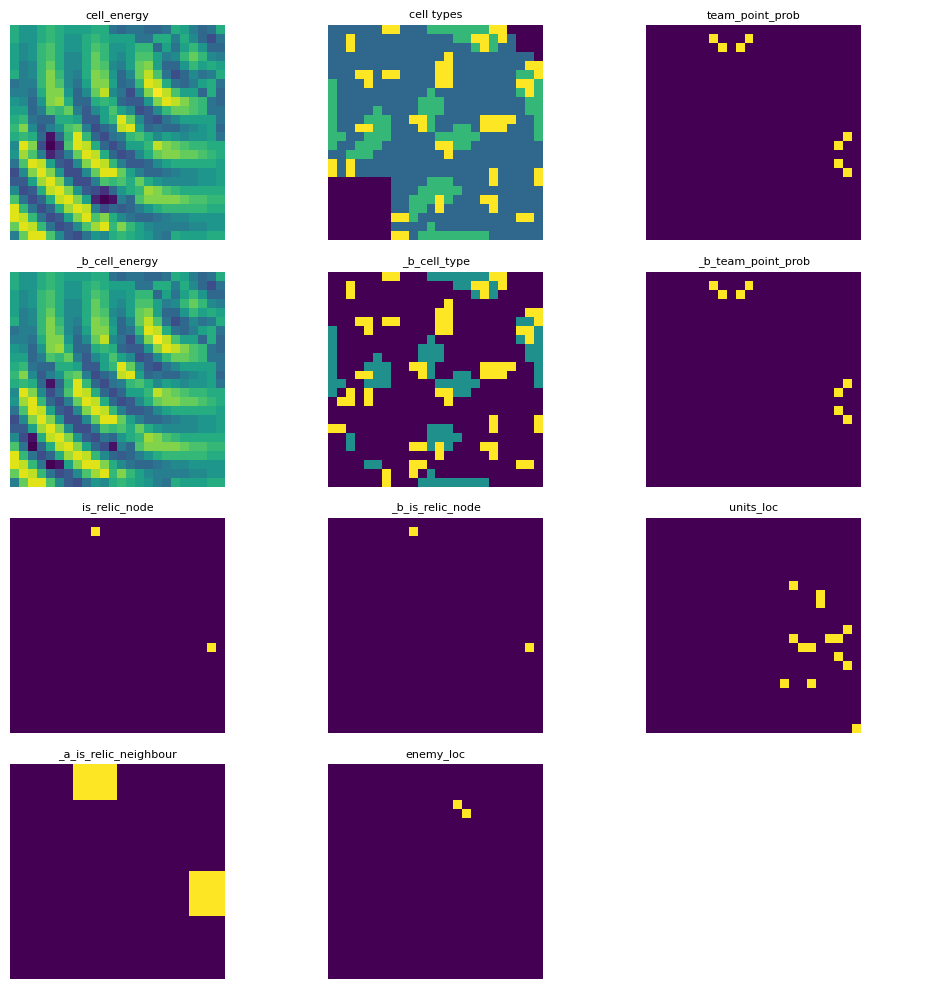

In [11]:
PLAYER_ID = 1
ob = obs[PLAYER_ID]
print(ob['game_step'][0][0][0] * 505, ob['match_step'][0][0][0] * 100)

units_loc = ob['units_loc_t0']
units_energy = ob['units_energy_t0']
enemy_loc = ob['enemy_loc_t0']

nu = env.mms[PLAYER_ID].past_obs[0]['units_mask'][0].sum()
print(f'number of units: {nu}')

plot_imgs([('cell_energy', ob['_a_cell_energy']), ('cell types', ob['_a_cell_type']), ('team_point_prob', ob['_a_team_point_prob']),
           ('_b_cell_energy', ob['_b_cell_energy']), ('_b_cell_type', ob['_b_cell_type']), ('_b_team_point_prob', ob['_b_team_point_prob']),    
            ('is_relic_node', ob['_a_is_relic_node']), ('_b_is_relic_node', ob['_b_is_relic_node']),  
           ('units_loc', units_loc > 0),  ('_a_is_relic_neighbour', ob['_a_is_relic_neighbour']), ('enemy_loc', enemy_loc > 0) 
           ])

In [12]:
env.raw_obs['player_1']['units']['position'][1]

array([[13, 11],
       [23, 23],
       [21, 15],
       [19,  8],
       [16, 13],
       [22, 16],
       [16,  7],
       [17, 14],
       [22, 12],
       [22, 12],
       [15, 18],
       [19,  9],
       [21, 13],
       [20, 13],
       [18, 14],
       [18, 18]], dtype=int16)

In [13]:
env.raw_obs['player_1']['units']['energy'][1]

array([-44, 100, 111,  91,  16,   0,   4,  98,  90,  39, 118,  58,  91,
       106,  66, 110], dtype=int16)

In [14]:
env.raw_obs['player_1']['units_mask'][1]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [15]:
a1.mm.get_unit_positions(env.raw_obs['player_1'], a1.mm.player_id)

array([[23, 23],
       [21, 15],
       [19,  8],
       [16, 13],
       [22, 16],
       [16,  7],
       [17, 14],
       [22, 12],
       [22, 12],
       [15, 18],
       [19,  9],
       [21, 13],
       [20, 13],
       [18, 14],
       [18, 18]], dtype=int16)

In [16]:
ob = env.raw_obs['player_1']
pid = 1
drop_died = True

unit_masks = ob['units_mask'][pid]
unit_energy = ob['units']['energy'][pid]

mask = unit_masks
if drop_died:
    mask &= (unit_energy >= 0)

unit_positions = ob['units']['position'][pid][mask]


In [17]:
unit_masks

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [18]:
unit_energy >= 0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [19]:
(unit_energy >= 0) & (unit_masks)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [20]:
len(env.mms[1].team_point_probs)

100

In [21]:
from ecobangbang.env.mapmanager import SAVE_ALL_STEPS_TP_PROB

SAVE_ALL_STEPS_TP_PROB

True

<Axes: xlabel='step'>

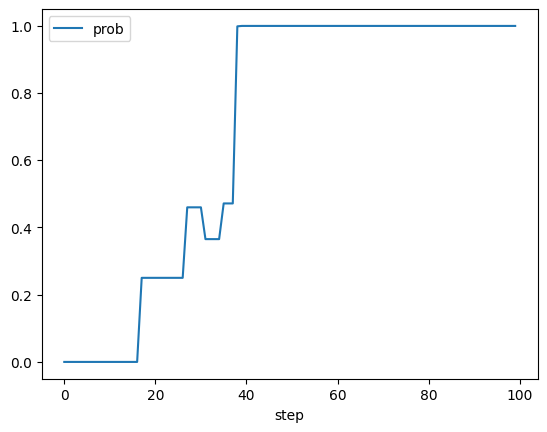

In [39]:
def extract_all(pos):
    return [(step, probs[pos[0]][pos[1]])
            for step, probs in enumerate(env.mms[1].team_point_probs)]


pd.DataFrame(extract_all((21, 13)), columns=['step', 'prob']).set_index('step').plot()

<Axes: xlabel='step'>

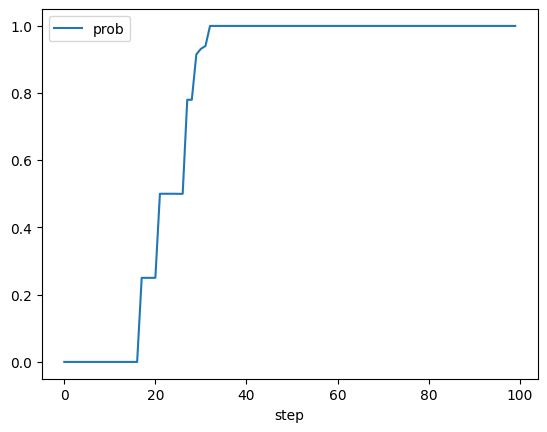

In [40]:
pd.DataFrame(extract_all((22, 16)), columns=['step', 'prob']).set_index('step').plot()

<Axes: xlabel='step'>

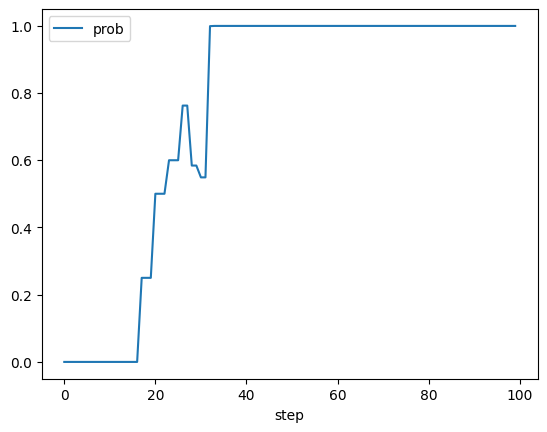

In [41]:
pd.DataFrame(extract_all((21, 15)), columns=['step', 'prob']).set_index('step').plot()

<Axes: xlabel='step'>

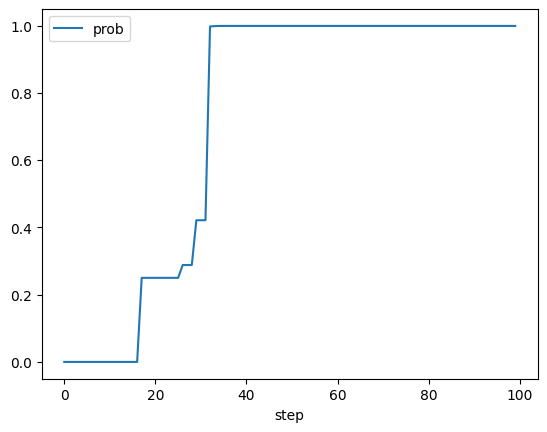

In [42]:
pd.DataFrame(extract_all((22, 12)), columns=['step', 'prob']).set_index('step').plot()

100.0 100.0
number of units: 2


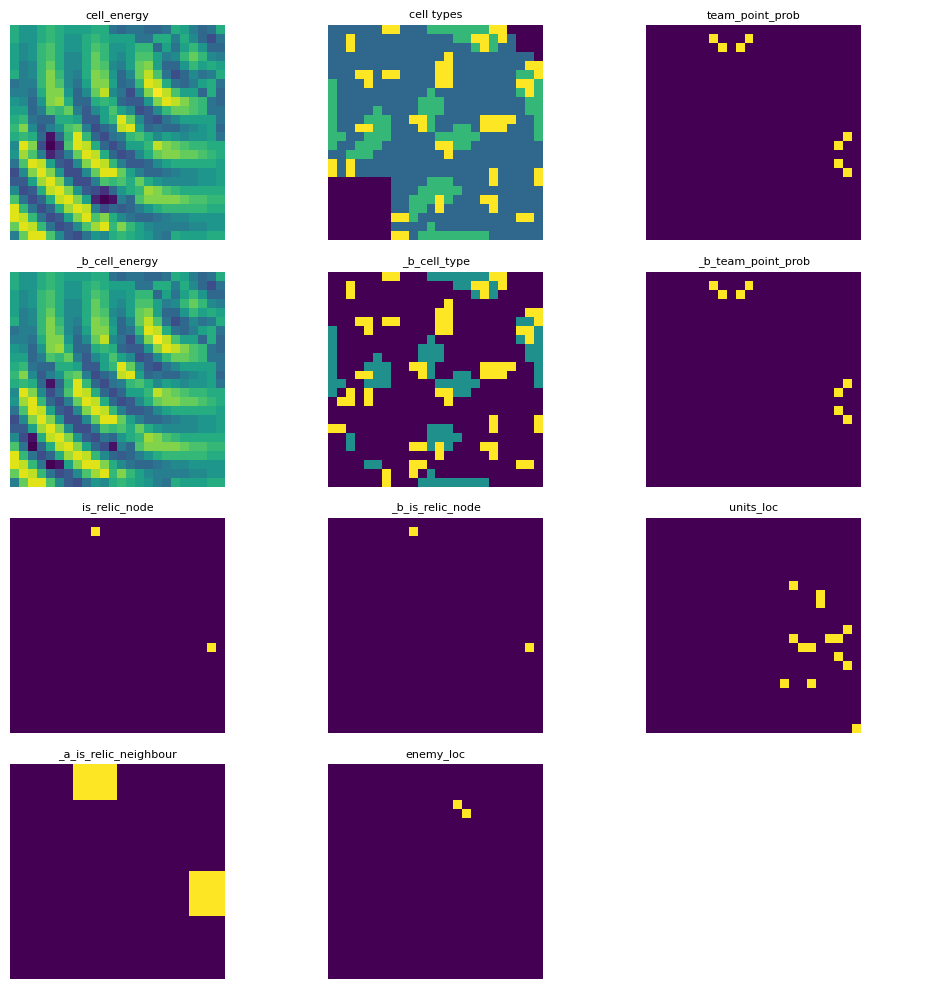

In [23]:
PLAYER_ID = 1
ob = obs[PLAYER_ID]
print(ob['game_step'][0][0][0] * 505, ob['match_step'][0][0][0] * 100)

units_loc = ob['units_loc_t0']
units_energy = ob['units_energy_t0']
enemy_loc = ob['enemy_loc_t0']

nu = env.mms[PLAYER_ID].past_obs[0]['units_mask'][0].sum()
print(f'number of units: {nu}')

plot_imgs([('cell_energy', ob['_a_cell_energy']), ('cell types', ob['_a_cell_type']), ('team_point_prob', ob['_a_team_point_prob']),
           ('_b_cell_energy', ob['_b_cell_energy']), ('_b_cell_type', ob['_b_cell_type']), ('_b_team_point_prob', ob['_b_team_point_prob']),    
            ('is_relic_node', ob['_a_is_relic_node']), ('_b_is_relic_node', ob['_b_is_relic_node']),  
           ('units_loc', units_loc > 0),  ('_a_is_relic_neighbour', ob['_a_is_relic_neighbour']), ('enemy_loc', enemy_loc > 0) 
           ])

In [24]:
env.raw_obs['player_1']['units']['position'][1]

array([[13, 11],
       [23, 23],
       [21, 15],
       [19,  8],
       [16, 13],
       [22, 16],
       [16,  7],
       [17, 14],
       [22, 12],
       [22, 12],
       [15, 18],
       [19,  9],
       [21, 13],
       [20, 13],
       [18, 14],
       [18, 18]], dtype=int16)

In [25]:
env.raw_obs['player_1']['units']['energy'][1]

array([-44, 100, 111,  91,  16,   0,   4,  98,  90,  39, 118,  58,  91,
       106,  66, 110], dtype=int16)

In [26]:
env.raw_obs['player_1']['units_mask'][1]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [27]:
from scipy.ndimage import maximum_filter, minimum_filter
from ecobangbang.env.mapmanager import *

energy_node = (4, 15)
mp = np.zeros(MAP_SHAPE2, dtype=bool)

mp[energy_node[0]][energy_node[1]] = True
mp = maximum_filter(mp, size=MAX_ENERGY_NODE_DRIFT_MAGNITUDE*2+1)
# mp[energy_node[0]][energy_node[1]] = False

upper = generate_manhattan_mask((MAP_WIDTH, MAP_HEIGHT), (0, 0),
                                MAP_WIDTH-1)
mp[~(upper)] = False

np.argwhere(mp)
len(np.argwhere(mp))

89

# Debug enery field

array([ 5,  2, -1, -5, -6, -4,  2,  8,  9,  8,  1, -4, -6, -4,  2,  8,  9,
        8,  3, -3, -6, -4,  3,  9, -4,  2, -1, -2, -4, -4, -3,  1,  6,  9,
        8,  3, -4, -6, -2,  5,  9, -2, -5, -1,  6,  1,  1, -1, -3, -6, -5,
       -1,  5,  9,  8,  1, -5, -5,  1,  7,  7,  1, -4, -3,  3,  4,  5,  5,
        3, -1, -5, -6, -1,  6,  9,  6, -1, -5, -2,  5,  8,  4, -2, -4,  1,
        4,  6,  8,  9,  6,  0, -5, -5,  1,  7,  8,  2, -4, -4,  2,  7,  6,
        0, -4, -1,  1,  1,  4,  8, 10,  6, -1, -6, -3,  4,  8,  5, -1, -4,
        0,  6,  6,  2, -3, -2, -2, -4, -3,  2,  8,  9,  3, -3, -4,  1,  6,
        6,  1, -3, -1,  4,  6,  3, -2, -2, -1, -4, -6, -3,  4,  8,  5, -1,
       -4,  0,  5,  6,  2, -2, -1,  3,  6,  3, -1, -2,  3,  0, -4, -4,  1,
        6,  5,  1, -2, -1,  4,  5,  2, -1, -1,  2,  5,  3, -1, -2,  1,  5,
        3, -1, -2,  1,  4,  4,  1, -1,  0,  3,  5,  2, -1, -1,  2,  4,  3,
        0, -1,  1,  1,  2,  1,  1,  3,  3,  1,  0,  0,  3,  4,  2,  0,  0,
        2,  4,  3,  0, -1

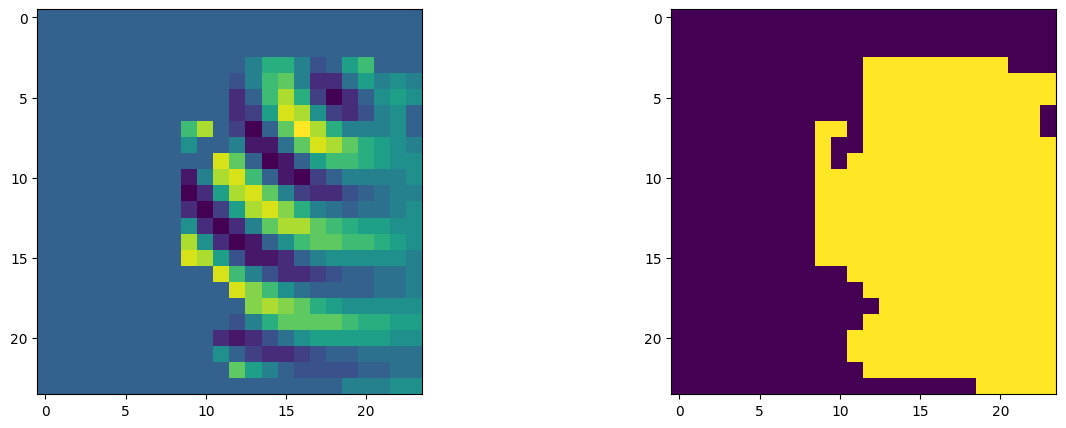

In [28]:
sensor_mask = env.raw_obs['player_1']['sensor_mask']
map_energy = env.raw_obs['player_1']['map_features']['energy']
filtered_energy_field = map_energy[sensor_mask]
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].imshow(map_energy.T)
axes[1].imshow(sensor_mask.T)
filtered_energy_field

Array(False, dtype=bool)

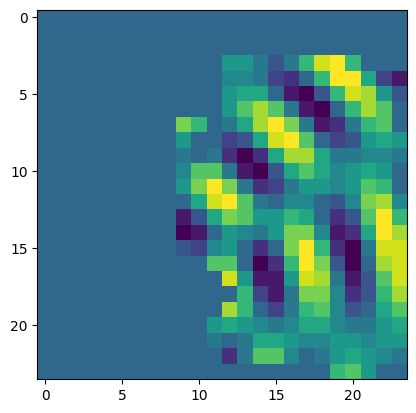

In [29]:
m, f = env.mms[1].energy_node_estimator.is_energy_filed_match((1, 15), filtered_energy_field, sensor_mask)
f = np.asarray(f).copy()
f[~sensor_mask] = -1
plt.imshow(f.T)
m

In [30]:
f[sensor_mask]

array([ 6,  2,  0,  1,  2, -1, -5, -6, -2,  4,  5,  6,  3, -2, -5, -3,  0,
        5,  9,  8,  3, -1,  1,  5,  2,  0,  2,  1,  2,  2,  0, -3, -4,  0,
        6,  9,  6,  2,  2,  5,  8,  7,  3, -1, -4,  2,  1,  3,  5,  3, -2,
       -6, -5,  0,  5,  5,  1, -1, -1,  2,  4,  4,  2,  0,  0,  0,  0,  3,
        7,  7,  3, -4, -6, -4,  0,  2,  0, -4, -6, -5, -3, -1,  1,  3,  5,
       -2, -3, -1,  5,  9,  8,  3, -2, -3, -1,  2,  2, -1, -4, -5, -5, -3,
        0,  3,  5,  0, -4, -5,  0,  6,  9,  7,  3,  0,  1,  4,  6,  6,  4,
        2,  0,  0,  1,  2,  1,  4, -1, -6, -5,  0,  5,  7,  5,  2,  1,  3,
        6,  9,  9,  8,  6,  4,  3,  1, -1,  8,  4, -2, -6, -5, -1,  3,  3,
        2, -1, -1,  1,  4,  6,  7,  6,  5,  3,  1,  0,  9,  9,  4, -1, -4,
       -3,  0,  1,  1, -2, -4, -5, -4, -2,  0,  1,  1,  1,  2,  2,  4,  4,
        9,  8,  4,  0, -2,  0,  2,  2,  1, -2, -4, -6, -6, -5, -4, -2,  0,
        2,  3,  5,  3,  7,  7,  4,  2,  1,  3,  5,  6,  5,  3,  0, -1, -2,
       -2, -1,  0,  1,  2

Array(False, dtype=bool)

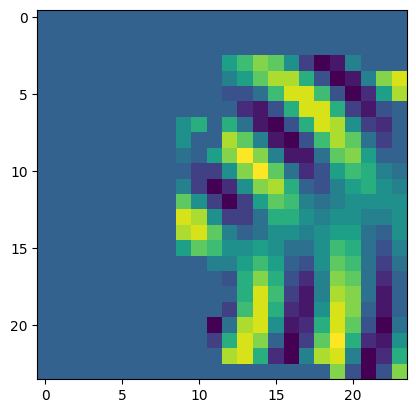

In [31]:
m, f = env.mms[1].energy_node_estimator.is_energy_filed_match((4, 15), filtered_energy_field, sensor_mask)
f = np.asarray(f).copy()
f[~sensor_mask] = -1
plt.imshow(f.T)
m

In [32]:
f[sensor_mask]

array([ 2,  2,  0, -1,  1,  6,  9,  8,  3,  4, -3, -3,  2,  8,  9,  6,  3,
       -3, -6, -3,  2,  6,  5,  1, -6, -3,  3,  1, -2, -1,  4,  8,  7,  2,
       -4, -6, -3,  1,  2,  1, -2, -3,  0,  4,  8,  5,  3, -2, -4,  0,  6,
       10,  7,  2, -3, -3, -1,  2,  3,  4,  4,  5,  8,  9,  9,  7,  6,  0,
       -5, -5,  1,  7, 10,  7,  3,  0,  0,  3,  5,  7,  9,  9,  9,  7,  4,
        6,  8,  5, -2, -6, -5,  1,  6,  8,  6,  4,  2,  2,  3,  4,  5,  4,
        2, -1, -4,  2,  8,  9,  4, -2, -6, -5,  0,  4,  5,  4,  2,  0, -1,
       -2, -3, -4, -5, -6, -6, -3,  4,  9,  9,  4, -2, -5, -4, -1,  1,  2,
        1,  0, -2, -4, -5, -5, -4, -3,  1, -6, -2,  5,  9,  9,  5,  0, -2,
       -2,  0,  1,  2,  2,  2,  1,  1,  2,  4,  6,  8, -5, -6, -2,  4,  8,
        8,  6,  3,  1,  1,  2,  3,  5,  6,  7,  8,  9,  9, 10,  9,  7,  1,
       -5, -6, -3,  2,  6,  7,  5,  3,  2,  2,  3,  4,  5,  6,  7,  7,  6,
        4,  1, -2,  1, -4, -5, -3,  0,  3,  4,  4,  2,  1,  0,  0,  0,  0,
        0, -1, -2, -4, -6

# Debug score assigment

In [33]:
from ecobangbang.agent import *

In [34]:
SUBMIT_AGENT = False

In [35]:
self = a1

In [36]:
mm.team_point_mass[21][13]

NameError: name 'mm' is not defined

In [ ]:
mm.team_point_mass[22][12]

In [ ]:
mm = self.mm
is_explore_step = (mm.match_step <= 50 and mm.game_step < 303)

match_observed = mm.match_observed + anti_diag_sym(mm.match_observed)
energy_threshold = 60 + mm.match_step

# TODO: test drop it
if mm.match_step >= 70:
  energy_threshold = 60

has_found_relic = mm.has_found_relic_in_match()
n = (MAP_WIDTH * MAP_HEIGHT)
n_explore = n - match_observed.sum()
expore_score = n * EXPLORE_CELL_SCORE / (n_explore + 1)
print(
    f' +++ step={mm.game_step} to-exp-cell-num={n_explore} exp_score={expore_score} has_found_relic={has_found_relic}, last_match_found_relic={mm.last_match_found_relic}',
    file=sys.stderr)

def get_explore_weight(upos, energy, cpos):
  if mm.game_step >= (3 * MAX_MATCH_STEPS):
    return 0

  if not mm.last_match_found_relic:
    return 0

  if has_found_relic:
    return 0

  if match_observed[cpos[0]][cpos[1]]:
    return 0

  return min(expore_score, MAX_EXPLORE_SCORE)

energy_map = mm.cell_energy.copy()
energy_map[mm.cell_energy != CELL_UNKONWN] -= mm.unit_move_cost
energy_map[mm.cell_type == CELL_NEBULA] -= mm.nebula_energy_reduction
if not SUBMIT_AGENT:
  print(
      f'>>>>>>>>>>>>>>> nebula_energy_reduction={mm.nebula_energy_reduction}',
      file=sys.stderr)

fire_zone = self.gen_fire_zone()

player_init_pos = get_player_init_pos(mm.player_id)
d1 = generate_manhattan_dist(MAP_SHAPE2,
                             player_init_pos).astype(np.float32)
# d1[d1 > MAP_WIDTH] = MAP_WIDTH
d1 /= MAP_WIDTH

def get_fuel_energy(upos, energy, cpos):
  e = fuel = energy_map[cpos[0]][cpos[1]]
  fuel = right_tailed_exp(energy, fuel, energy_threshold)

  # Boost more net energy position without energy thresholding
  if e > 0 and fire_zone[cpos[0]][cpos[1]]:
    fuel += (e * d1[cpos[0]][cpos[1]])

  return fuel

enemy_sap_range = self.get_enemy_sap_range()

def get_open_relic_nb(upos, energy, cpos):
  """First visit on relic neighbour"""
  if not mm.is_relic_neighbour[cpos[0]][cpos[1]]:
    return 0

  # if not mm.match_visited[cpos[0]][cpos[1]]:
  # return RELIC_NB_SCORE

  p = mm.team_point_mass[cpos[0]][cpos[1]]
  if p < MIN_OPEN_RELIC_NB_PROB:
    return 0

  v = RELIC_NB_SCORE
  # Lower relic nb on enemy side
  if on_enemy_side(cpos, mm.player_id):
    # v = mm.unit_sap_cost / 10 * p
    v = mm.unit_sap_cost / 10

  # If enemy may sap it, lower its weight
  if enemy_sap_range[cpos[0]][cpos[1]]:
    v = mm.unit_sap_cost / 10 * 0.5

  last_visited_step = mm.last_visited_step[cpos[0]][cpos[1]]
  t = mm.game_step - last_visited_step
  alpha = np.log(t + 1) / LOG3
  w = min(alpha, 1) * v

  # cpos_nb_mask = gen_sap_range(cpos, self.mm.unit_sap_range)
  # if (mm.enemy_max_energy[cpos_nb_mask] > energy).sum() > 0:
  # w = -1
  return w

init_pos = get_player_init_pos(mm.enemy_id)
enemy_half = generate_manhattan_mask(MAP_SHAPE2,
                                     init_pos,
                                     range_limit=MAP_WIDTH - 1)
blind_shot_targets = ((~mm.visible) &
                      (mm.team_point_mass > IS_RELIC_CELL_PROB)
                      & enemy_half)
# blind_shot_targets = np.zeros(MAP_SHAPE2, dtype=bool)  # disable blind shot
self.blind_shot_targets = blind_shot_targets

def stay_on_relic(upos, energy, cpos):
  # If the relic node has been occupied by unit but not this one, lower its score
  if (mm.unit_positions[cpos[0]][cpos[1]] and not pos_equal(upos, cpos)):
    print(f" relic node has been occupied by unit but not this one")
    return 0

  # # Relic unit do not change relic position
  # p_unit = mm.team_point_mass[upos[0]][upos[1]]
  # if (p_unit > IS_RELIC_CELL_PROB and not pos_equal(upos, cpos)):
  # return 0

  # Will score only for relic p > 0.8
  v = RELIC_SCORE
  p = mm.team_point_mass[cpos[0]][cpos[1]]

  # Do not goto enemy side if energy below threshold
  if on_enemy_side(cpos, mm.player_id):
    v = mm.unit_sap_cost / 10

  # If enemy may sap it, lower its weight
  if not pos_equal(cpos, upos) and enemy_sap_range[cpos[0]][cpos[1]]:
    v = mm.unit_sap_cost / 10 * 0.5

  w = 0
  if p > IS_RELIC_CELL_PROB:
    w += v * p

  return w

hit_factor = 10
enemy_hit_map = self.get_sap_hit_map(hit_factor)
enemy_hit_map[
    blind_shot_targets] += mm.unit_sap_cost  # roughly adding 3 points
self.enemy_hit_map = enemy_hit_map

def get_sap_enemy_score(upos, energy, cpos):
  """Max sap damage that could be hit from the `cpos`."""
  if not can_attack(energy, mm):
    return 0

  # Do not attack from negtive energy position
  # fuel = energy_map[cpos[0]][cpos[1]]
  # if fuel <= 0:
  # return 0

  sap_range = gen_sap_range(cpos, self.mm.unit_sap_range)

  h = enemy_hit_map[sap_range].max()
  h /= hit_factor

  # Boost unit with extra energy for SAP
  h *= min(energy / BOOST_SAP_ENERGY_THRESHOOD, 1)

  # sap if energy is large (and unit not on relic)
  # if self.mm.team_point_mass[pos[0]][pos[1]] < 0.6:
  # h *= max((energy / energy_threshold), 1)
  return h

score_debug = {}

def get_unit_cell_wt(upos, energy, cpos, unit_cost_map):
  if cant_move_to(upos, cpos, mm):
    return -9999

  if energy < unit_cost_map[cpos[0]][cpos[1]]:
    # if not SUBMIT_AGENT:
    # print(f'game_step={mm.game_step}: skip due to inf at {cpos}',
    # file=sys.stderr)
    return -9999

  # Do not target cell with enemy energy > unit energy
  if energy < mm.enemy_max_energy[cpos[0]][cpos[1]]:
    return -9999

  # mdist = manhatten_distance(upos, cpos) + 7
  mdist = dd(manhatten_distance(upos, cpos) + 1)
  wt = 0.0001

  energy_ratio = energy / energy_threshold

  expore_wt = get_explore_weight(upos, energy, cpos)

  fuel_wt = get_fuel_energy(upos, energy, cpos)

  relic_nb_wt = get_open_relic_nb(upos, energy, cpos)

  on_relic_wt = stay_on_relic(upos, energy, cpos)

  sap_wt = get_sap_enemy_score(upos, energy, cpos)

  # If enemy hit me at relic position, skip them?
  cpos_nb_mask = gen_sap_range(cpos, self.mm.unit_sap_range + 1)
  # any_enemy_nearby = mm.enemy_position_mask_can_negtive[cpos_nb_mask].sum(
  # ) > 0
  # if not any_enemy_nearby and energy_lost_mask[cpos[0]][cpos[1]]:
  # on_relic_wt *= 0.2
  # relic_nb_wt *= 0.2

  wt += (expore_wt + fuel_wt + relic_nb_wt + on_relic_wt + sap_wt) / mdist

  is_relic_nb = mm.is_relic_neighbour[cpos[0]][cpos[1]]
  # has enemy nearby, dangerous, go away
  has_enemy_nearby = (mm.enemy_max_energy[cpos_nb_mask] > energy).sum() > 0
  if (has_enemy_nearby
      and (not is_relic_nb or on_enemy_side(cpos, mm.player_id))):
    wt -= self.mm.unit_sap_cost / 10
    print(f"has enemy nearby, dangerous, go away: {self.mm.unit_sap_cost / 10}")

  score_debug[(tuple(upos), tuple(cpos))] = {
      'explore_wt': expore_wt,
      'fuel_wt': fuel_wt,
      'relic_nb_wt': relic_nb_wt,
      'on_relic_wt': on_relic_wt,
      'sap_wt': sap_wt,
      'energy_ratio': energy_ratio,
      'wt': wt,
      'mdist': mdist,
  }

  # if USE_RANDOM:
  # wt += np.random.rand() / 1000
  return wt



In [ ]:
self.mm.game_step

In [ ]:
upos = (21, 13)
unit_cost_map = self.compute_energy_cost_map(upos, asteriod_cost=75)

energy = 106
get_unit_cell_wt(upos, energy, upos, unit_cost_map)

In [ ]:
cpos = (20, 12)
get_unit_cell_wt(upos, energy, cpos, unit_cost_map)

In [ ]:
score_debug

In [ ]:
mm.team_point_mass[21][16]

In [ ]:
mm.game_step

In [ ]:
energy_lost_mask[]

In [ ]:
mm.sap_dropoff_factor_estimator.unit_energy_lost_step[21][16]

In [ ]:
from ecobangbang.agent import *

In [ ]:
hit_map = np.zeros((MAP_WIDTH, MAP_HEIGHT), dtype=float)

for i in range(MAX_UNIT_NUM):
  mask, pos, energy = self.mm.get_unit_info(self.mm.enemy_id, i, t=0)
  if not mask:
    continue

  if self.mm.enemy_positions[pos[0]][pos[1]]:
    p = self.mm.team_point_mass[pos[0]][pos[1]]
    hit_map[pos[0]][pos[1]] += (RELIC_SCORE * (p**2))

  for d in [1, 0]:
    x0 = max(0, (pos[0] - d))
    x1 = min(MAP_WIDTH, (pos[0] + d + 1))
    y0 = max(0, (pos[1] - d))
    y1 = min(MAP_HEIGHT, (pos[1] + d + 1))

    h = self.mm.unit_sap_cost
    if d == 1:
      h *= self.mm.unit_sap_dropoff_factor
    hit_map[x0:x1, y0:y1] += h

cpos = upos
sap_range = gen_sap_range(cpos, self.mm.unit_sap_range)

In [ ]:
plot_imgs([('enemy_hit_map', enemy_hit_map), ('mm.enemy_positions', mm.enemy_positions), ('hit_map', hit_map),
           ('sap_range', sap_range), ])

In [ ]:
print("============ game step 468 ========== \nunit[[9 3]] and cell ((1, 0)) wt={'explore_wt': 0, 'fuel_wt': -3.726653172078671e-05, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 8.81257345245768e-05, 'mdist': 3.138428376721003}\nunit[[9 3]] and cell ((2, 0)) wt={'explore_wt': 0, 'fuel_wt': -2.9813225376629368e-05, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 8.955064638162758e-05, 'mdist': 2.8531167061100025}\nunit[[9 3]] and cell ((3, 0)) wt={'explore_wt': 0, 'fuel_wt': -1.8633265860393355e-05, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 9.281606938736897e-05, 'mdist': 2.5937424601000023}\nunit[[9 3]] and cell ((4, 0)) wt={'explore_wt': 0, 'fuel_wt': -7.453306344157342e-06, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 9.683907053044235e-05, 'mdist': 2.357947691000002}\nunit[[9 3]] and cell ((5, 0)) wt={'explore_wt': 0, 'fuel_wt': 3.726653172078671e-06, 'relic_nb_wt': 0, 'on_relic_wt': ")

# Map Tile Shift Estimation

In [ ]:
partial = ob['_a_cell_type'][0, :, :]

In [ ]:
cell_map = ob['_b_cell_type'][0, :, :]
plt.imshow(cell_map.T)

In [ ]:
def shift_map(mp, n):
    mp = np.roll(mp, shift=-n, axis=0)  # Shift Up
    mp = np.roll(mp, shift=n, axis=1)  # Shift right
    return mp


fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

axes[0].imshow(partial.T)
axes[1].imshow(shift_map(partial, -1).T)

In [ ]:
a = cell_map == 2

a.size

In [ ]:
(cell_map[cell_map == 2] != partial[cell_map == 2]).any()

In [ ]:
x = np.array([-0.15, -0.1, -0.05, -0.025, 0.025, 0.05, 0.1, 0.15])

1 / x

In [ ]:
def should_tile_change(steps, nebula_tile_drift_speed):
    return (steps - 1) * abs(nebula_tile_drift_speed) % 1 > steps * abs(nebula_tile_drift_speed) % 1


x = np.linspace(0, 500, 101)


df = pd.DataFrame({
    'x': x,
    'c15': should_tile_change(x, 0.15).astype(int),
    # 'c20': -should_tile_change(x, 0.10).astype(int),
    # 'c05': should_tile_change(x, 0.05).astype(int),
    'c025': -should_tile_change(x, 0.01).astype(int),
})

df.set_index('x').plot()